# Test SAM Indeces Calc

In [1]:
import sys
sys.path.append(sys.path[0]+'/../..')


import helpers.fileHandler as fh
import utils.pslIndex as psl

In [2]:
import matplotlib.pyplot as plt
import numpy
import cftime
import xarray

First load up the cvdp and figure out the details of the index we want to calculate

In [4]:
ds = fh.loadModelData('CCSM4', 'psl', 'past1000')


E:/CMIP5-PMIP3/past1000/psl/
Files imported: 
 ['E:/CMIP5-PMIP3/past1000/psl/psl_Amon_CCSM4_past1000_r1i1p1_085001-185012.nc']


In [8]:
ds=ds.rename({'psl':'PSL'})

In [9]:
sam,normalised=psl.calculateSamIndex(ds, 850, 1849)

C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 1001 times more chunks
  return self.array[key]
C:\Anaconda3\lib\site-packages\xarray\core\indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 1001 times more chunks
  return self.array[key]


In [10]:
sam

<xarray.DataArray 'sam' (time: 12012)>
dask.array<sub, shape=(12012,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-01-16 12:00:00 ... 1850-12-16 12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

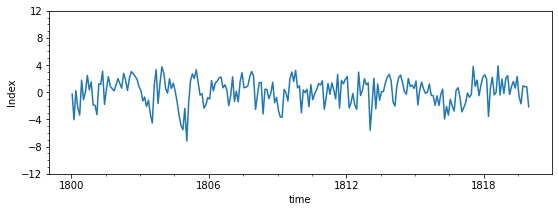

In [11]:

#Thdatasult should be the same as 
# https://github.com/nickywright/palaeoclimate-lastmillennium/blob/master/SAM%20index%20tests.ipynb (Section 1)

sam.sel(
    time=slice(cftime.DatetimeNoLeap(1800,1,1),
               cftime.DatetimeNoLeap(1820,1,1)),
).plot(
    x='time' ,
    figsize=(9,3)
)


plt.ylabel('Index')
plt.ylim(-12,12)
plt.yticks(numpy.arange(-12,14,4))
plt.minorticks_on()


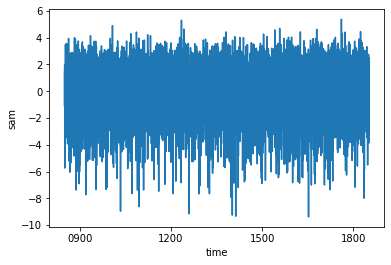

In [13]:
sam.plot()

In [14]:
normalised

<xarray.Dataset>
Dimensions:  (time: 12012)
Coordinates:
  * time     (time) object 0850-01-16 12:00:00 ... 1850-12-16 12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    lat1     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    lat2     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    lat1:     -40
    lat2:     -65